In [19]:
from kan import *
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
torch.set_default_dtype(torch.float64)

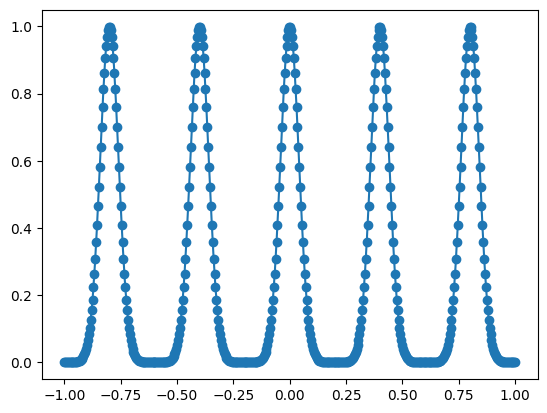

In [20]:
datasets = []

n_peak = 5
n_num_per_peak = 100
n_sample = n_peak * n_num_per_peak

x_grid = torch.linspace(-1,1,steps=n_sample)

x_centers = 2/n_peak * (np.arange(n_peak) - n_peak/2+0.5)

x_sample = torch.stack([torch.linspace(-1/n_peak,1/n_peak,steps=n_num_per_peak)+center for center in x_centers]).reshape(-1,)


y = 0.
for center in x_centers:
    y += torch.exp(-(x_grid-center)**2*300)
    
y_sample = 0.
for center in x_centers:
    y_sample += torch.exp(-(x_sample-center)**2*300)
    

plt.plot(x_grid.detach().numpy(), y.detach().numpy())
plt.scatter(x_sample.detach().numpy(), y_sample.detach().numpy())
plt.show()

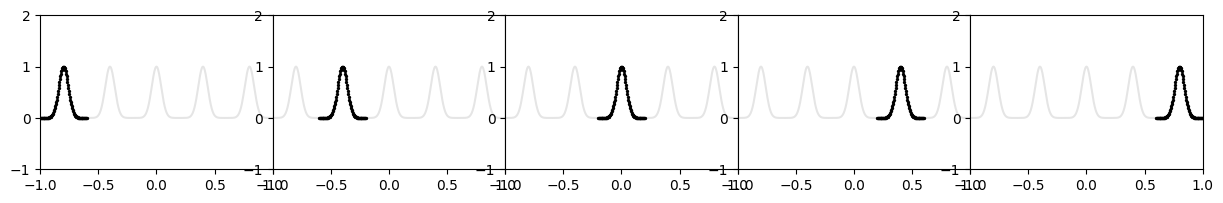

In [21]:
plt.subplots(1, 5, figsize=(15, 2))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(1,6):
    plt.subplot(1,5,i)
    group_id = i - 1
    plt.plot(x_grid.detach().numpy(), y.detach().numpy(), color='black', alpha=0.1)
    plt.scatter(x_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak].detach().numpy(), y_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak].detach().numpy(), color="black", s=2)
    plt.xlim(-1,1)
    plt.ylim(-1,2)

In [22]:
ys = []

# setting bias_trainable=False, sp_trainable=False, sb_trainable=False is important.
# otherwise KAN will have random scaling and shift for samples in previous stages

model = KAN(width=[1,1], grid=200, noise_scale=0.1, bias_trainable=False, sp_trainable=False, sb_trainable=False)

for group_id in range(n_peak):
    dataset = {}
    dataset['train_input'] = x_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]
    dataset['train_label'] = y_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]
    dataset['test_input'] = x_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]
    dataset['test_label'] = y_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]
    model.train(dataset=dataset, steps=100, update_grid=False)
    y_pred = model(x_grid[:,None])
    ys.append(y_pred.detach().numpy()[:,0])

train loss: 3.99e-06 | test loss: 3.99e-06 | reg: 1.26e-01 : 100%|█| 100/100 [00:00<00:00, 174.26it/
train loss: 3.99e-06 | test loss: 3.99e-06 | reg: 1.26e-01 : 100%|█| 100/100 [00:00<00:00, 207.41it/
train loss: 3.99e-06 | test loss: 3.99e-06 | reg: 1.26e-01 : 100%|█| 100/100 [00:00<00:00, 216.70it/
train loss: 3.99e-06 | test loss: 3.99e-06 | reg: 1.26e-01 : 100%|█| 100/100 [00:00<00:00, 186.84it/
train loss: 3.99e-06 | test loss: 3.99e-06 | reg: 1.26e-01 : 100%|█| 100/100 [00:00<00:00, 204.44it/


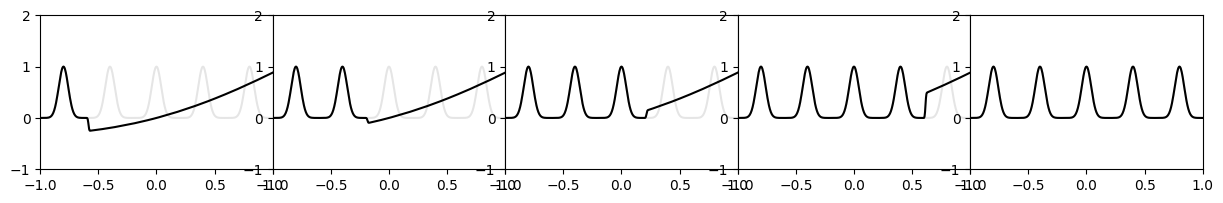

In [23]:
plt.subplots(1, 5, figsize=(15, 2))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(1,6):
    plt.subplot(1,5,i)
    group_id = i - 1
    plt.plot(x_grid.detach().numpy(), y.detach().numpy(), color='black', alpha=0.1)
    plt.plot(x_grid.detach().numpy(), ys[i-1], color='black')
    plt.xlim(-1,1)
    plt.ylim(-1,2)

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义神经网络结构（如果之前没有定义，需要先定义）
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# 初始化网络
input_size = 1
hidden_size = 10
output_size = 1
model = SimpleNN(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 假设x_sample和y_sample是已经定义好的数据
# n_peak和n_num_per_peak也是已定义的变量
ys = []


for group_id in range(n_peak):
    # 准备数据
    train_input = x_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]
    train_label = y_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]

    # 训练网络
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(train_input)
        loss = criterion(outputs, train_label)
        loss.backward()
        optimizer.step()

    # 预测
    with torch.no_grad():
        y_pred = model(x_grid[:,None])
        ys.append(y_pred.detach().numpy()[:,0])


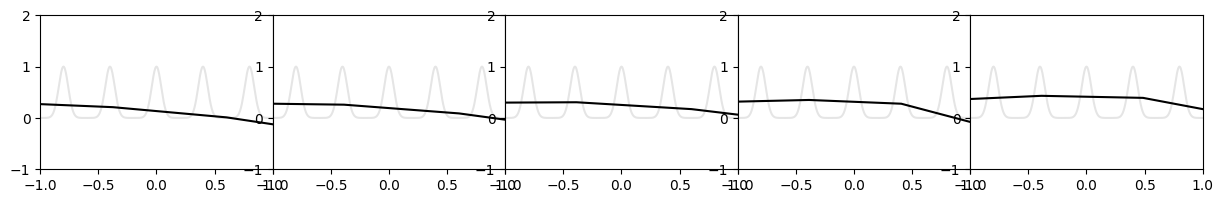

In [25]:
plt.subplots(1, 5, figsize=(15, 2))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(1,6):
    plt.subplot(1,5,i)
    group_id = i - 1
    plt.plot(x_grid.detach().numpy(), y.detach().numpy(), color='black', alpha=0.1)
    plt.plot(x_grid.detach().numpy(), ys[i-1], color='black')
    plt.xlim(-1,1)
    plt.ylim(-1,2)